# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
-0.003
-0.003
-0.003
-0.003
0.0
-0.003
-0.003
0.999
0.999
0.998
0.998
1.997
1.998
1.999
1.999
1.999
3.002
3.0
3.0
3.001
4.004
4.004
4.002
4.003
4.001
5.006
5.006
5.005
5.005
6.007
6.007
6.007
6.007
6.719
6.719
6.719
6.719
7.427
7.431
7.433
7.433
7.432
7.432
8.431
8.434
8.433
8.433
9.429
9.432
9.434
9.433
9.433
10.431
10.433
10.435
10.435
10.435
11.43
11.432
11.436
11.435
11.435
12.433
12.436
12.439
12.437
12.436
13.433
13.435
13.437
13.436
13.439
14.227
14.23
14.232
14.231
14.231
14.231
15.028
15.028
15.027
16.029
16.029
16.028
16.028
17.03
17.03
17.03
17.03
17.03
18.031
18.03
18.03
18.03
19.031
19.03
19.029
20.03
20.03
20.029
21.03
21.029
21.027
21.752
21.752
21.749
21.75
22.469
22.469
22.467
22.467
23.472
23.471
23.47
23.47
23.47
24.473
24.471
24.471
25.474
25.474
25.472
25.472
26.47
26.47
26.472
26.472
27.474
27.473
27.472
27.472
28.474
28.477
28.475
28.475
29.112
29.112
29.112


57.989
57.989
57.988
57.988
57.988
57.985
57.988
57.988
57.988
57.985
57.986
57.984
57.985
57.985
57.985
57.985
57.985
57.985
57.985
57.985
57.985
57.984
57.984
57.983
57.983
57.983
57.983
57.983
57.983
57.982
57.982
57.982
57.982
57.982
57.982
57.982
57.982
57.982
57.982
57.98
57.98
57.979
57.98
57.979
58.011
58.046
58.08
58.115
58.149
58.183
58.251
58.251
58.251
58.251
58.264
58.263
58.263
58.263
58.263
58.263
58.263
58.262
58.262
58.262
58.262
58.271
58.27
58.269
58.269
58.269
58.268
58.268
58.267
58.267
58.267
58.267
58.267
58.267
58.267
58.267
58.266
58.265
58.265
58.265
58.265
58.265
58.264
58.264
58.264
58.264
58.264
58.264
58.264
58.264
58.264
58.264
58.262
58.262
58.262
58.262
58.292
58.324
58.395
58.43
58.43
58.429
58.429
58.429
58.429
58.429
58.44
58.44
58.436
58.437
58.438
58.438
58.438
58.438
58.438
58.436
58.439
58.438
58.437
58.437
58.436
58.436
58.436
58.436
58.436
58.436
58.436
58.436
58.436
58.435
58.435
58.435
58.435
58.435
58.435
58.435
58.435
58.435
58.435
58.435
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1476,2952,60.079
1477,2954,60.077
1478,2956,60.077
1479,2958,60.077


<IPython.core.display.Javascript object>


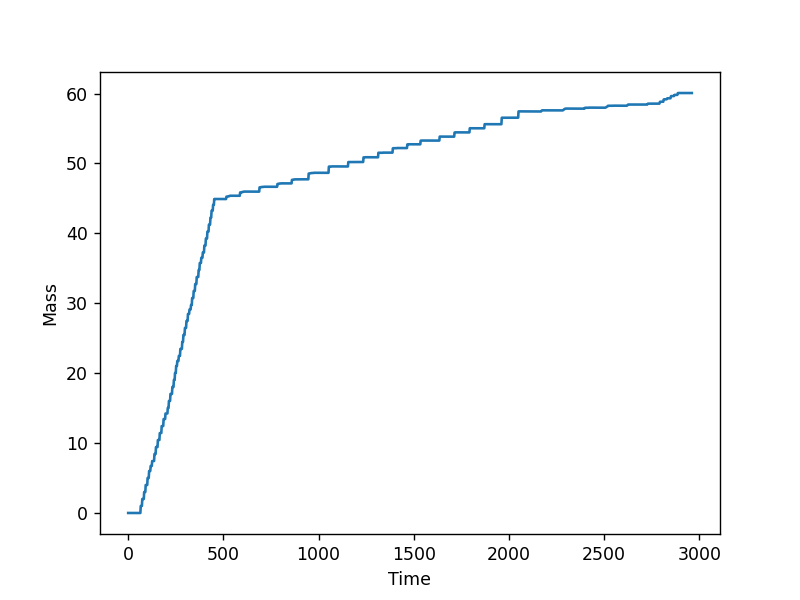

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_210323_S199-204.csv')